# 图像特效-Gotham效果

In [9]:
from scipy import signal
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [10]:
src = cv2.imread('../datas/f2.jpg')
gray = cv2.imread('../datas/f2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [11]:
def threshold(src,threshmax,newval):
    dst = np.zeros_like(src)
    idx = (src <= threshmax)
    dst[idx] = newval
    dst[~idx] = src[~idx]
    return dst

In [12]:
def brightness_contrast(img, alpha = 1.0, beta = 0):
    img_contrast = img * (alpha)
    img_bright = img_contrast + (beta)
    # img_bright = img_bright.astype(int)
#     img_bright = stats.threshold(img_bright,threshmax=255, newval=255)
#     img_bright = stats.threshold(img_bright,threshmin=0, newval=0)
    img_bright[img_bright < 0] = 0
    img_bright[img_bright > 255] = 255
    img_bright = img_bright.astype(np.uint8)
    return img_bright

In [13]:
def hue_saturation(img_rgb, alpha = 1, beta = 1):
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)
    hue = img_hsv[:,:,0]
    saturation = img_hsv[:,:,1]
    hue = threshold(hue * alpha ,threshmax=179, newval=179)
    saturation = threshold(saturation * beta,threshmax=255, newval=255)
    img_hsv[:,:,0] = hue
    img_hsv[:,:,1] = saturation
    img_transformed = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    return img_transformed

In [14]:
def gotham(img, hue = 1, saturation = 0.1, contrast = 1.3, brightness = -20):
    img = hue_saturation(img, hue, saturation)
    img = brightness_contrast(img, contrast, brightness)
    return img

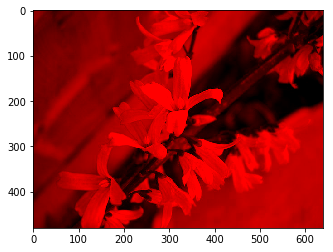

In [15]:
dst = gotham(rgb)
plt.imshow(dst)